<a href="https://colab.research.google.com/github/Vinibianchi/Python-datascience/blob/master/projeto_RNA_1_Reconhecimento_de_numeros_escritos_a_m%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
from matplotlib import pyplot as plt

# Inicios das importações do Keras (modelos de DP)
from keras.datasets import mnist    # Importar o ddataset mnist
from keras.models import Sequential 
from keras.layers import Dense, InputLayer
from keras.layers import Dropout
from keras.utils import np_utils

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [27]:
print(x_train.shape)
first_image = x_train[1002]

(60000, 28, 28)


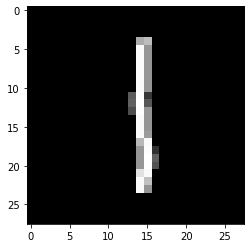

1


In [28]:
first_image = numpy.array(first_image, dtype = 'float')
pixels = first_image.reshape((28,28))
plt.imshow(pixels, cmap='gray') 
plt.show()

print(y_train[1002])


# Transfirmando dados


In [5]:
num_pixels = x_train.shape[1] * x_train.shape[2]
print(num_pixels)

784


In [6]:
# Transformando para float32
x_train2 = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_test2 = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')


# Normalizando dos valores dos pixels entre 0 e 1 

x_train2 = x_train2/255
x_test2 = x_test2/255





In [7]:
x_test2.shape

(10000, 784)

In [8]:
x_train2.shape

(60000, 784)

In [9]:
print(y_train[1000])

0


In [10]:
# Transforma os datasets em one-hot vector

y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

# Obtendo o número de Classes do problema
num_classes = y_test_h.shape[1]

print(num_pixels)
print(y_train[1001])
print(y_train_h[1001])

784
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


# Criação do Modelo

In [11]:
model = Sequential() # Define o modelo do tipo feedforward

model.add(InputLayer(input_shape = num_pixels))
model.add(Dense(1024, kernel_initializer = 'normal', activation='relu')) # Cria a primeira camada com 1024 neuronios, inicializacao dos parametros seguindo a curva normal e funcao de ativacao relu
model.add(Dense(2048, kernel_initializer= 'normal', activation='relu')) # cria segunda camada com 2048 neuronios 
model.add(Dense(num_classes, kernel_initializer='normal', activation= 'softmax')) # Cria a camada de saída. A ativação softmax normaliza a saida do vector, para melhor treinar o modelo

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                20490     
Total params: 2,923,530
Trainable params: 2,923,530
Non-trainable params: 0
_________________________________________________________________


# Treinamento do Modelo

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"]) # compila o modelo criado
result = model.fit(x_train2, y_train_h, validation_data = (x_test2, y_test_h), epochs=20, verbose =1, batch_size=100)

Epoch 1/20
600/600 [==============================] - 17s 4ms/step - loss: 0.3334 - accuracy: 0.9018 - val_loss: 0.1064 - val_accuracy: 0.9667
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0681 - accuracy: 0.9780 - val_loss: 0.0764 - val_accuracy: 0.9750
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0841 - val_accuracy: 0.9759
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0827 - val_accuracy: 0.9757
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0292 - accuracy: 0.9902 - val_loss: 0.0717 - val_accuracy: 0.9801
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0192 - accuracy: 0.9938 - val_loss: 0.1023 - val_accuracy: 0.9759
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.1111 - val_accuracy: 0.9761
Epoch

In [25]:
x = x_train2[1002]
print(x.shape)

x = numpy.expand_dims(x, axis = 0)
print(x.shape)


print(model.predict(x))
print(numpy.argmax(model.predict(x)))

(784,)
(1, 784)
[[4.4511307e-19 1.0000000e+00 1.6817444e-17 6.3439738e-19 1.9905676e-14
  5.0923477e-15 4.6260833e-17 5.4478317e-14 2.6548068e-11 2.4811006e-16]]
1
